In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
# Load the dataset
file_path = 'ISCEV Control ERG Flinders University.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows
data.head()

id  Test   age  Ethnic  vert      iris       Eye   a_time    a_amp  \
0     c1   LA3  14.5       2   2.0  1.141572  RightEye  11.3909 -5.23289   
1     c1   LA3  14.5       2   2.0  1.153924   LeftEye  11.3463 -3.98402   
2  c1000  30Hz   5.0       1   2.0  1.116472  RightEye      NaN      NaN   
3  c1000  30Hz   5.0       1   2.0  1.116472  RightEye      NaN      NaN   
4  c1000  30Hz   5.0       1   2.0  1.072432   LeftEye      NaN      NaN   

      b_time    b_amp  sex  OP_s_Amp  OP_s_Time  
0  29.126900  16.7272    0       NaN        NaN  
1  29.985200  18.8737    0       NaN        NaN  
2  26.763275  33.6818    1       NaN        NaN  
3  26.763275  33.6818    1       NaN        NaN  
4  26.763275  29.7059    1       NaN        NaN

In [ ]:
# Load the dataset
file_path = 'ISCEV Control ERG Flinders University.xlsx'
data = pd.read_excel(file_path)

# Define the condition for MDD based on specific feature thresholds
data['MDD'] = np.where((data['a_amp'] < -3.0) | (data['b_amp'] < 20.0), 1, 0)

# Select features and target
features = data[['age', 'vert', 'iris', 'a_time', 'a_amp', 'b_time', 'b_amp', 'sex']]
target = data['MDD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3795 - loss: nan - val_accuracy: 0.3271 - val_loss: nan
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3732 - loss: nan - val_accuracy: 0.3271 - val_loss: nan
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3298 - loss: nan - val_accuracy: 0.3271 - val_loss: nan
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3271 - loss: nan - val_accuracy: 0.3271 - val_loss: nan
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3285 - loss: nan - val_accuracy: 0.3271 - val_loss: nan
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3451 - loss: nan - val_accuracy: 0.3271 - val_loss: nan
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3702 - loss: nan - val_accuracy: 0.3271 - val_loss: nan
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3646 - loss: nan - val_accuracy: 0.3271 - val_loss: nan
Epoch 9/100
43/43 ━━━━━━━━━━━━━

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3565 - loss: nan  
Test Accuracy: 32.09%


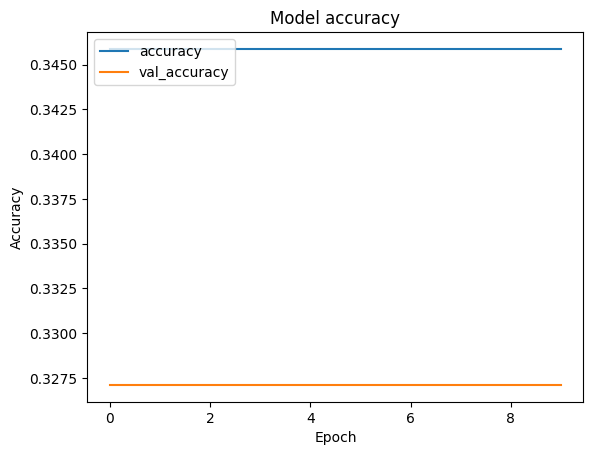

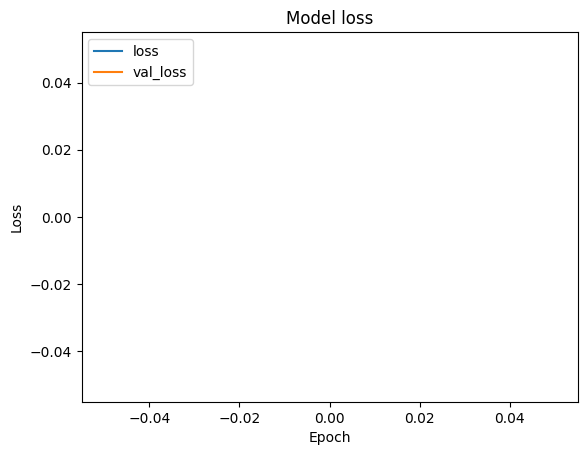

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()